# MFE230T

## Jen-Chieh Cheng

# Scikit-learn

In [1]:
import csv
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data

In [2]:
df = pd.read_csv('../loan.csv')

/Users/jenchieh/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Inspecting the data

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print df.shape
print df.dtypes.unique()

(887379, 74)
[dtype('int64') dtype('float64') dtype('O')]


In [5]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [6]:
g = df.columns.to_series().groupby(df.dtypes).groups
print g

{dtype('O'): Index([u'term', u'grade', u'sub_grade', u'emp_title', u'emp_length',
       u'home_ownership', u'verification_status', u'issue_d', u'loan_status',
       u'pymnt_plan', u'url', u'desc', u'purpose', u'title', u'zip_code',
       u'addr_state', u'earliest_cr_line', u'initial_list_status',
       u'last_pymnt_d', u'next_pymnt_d', u'last_credit_pull_d',
       u'application_type', u'verification_status_joint'],
      dtype='object'), dtype('int64'): Index([u'id', u'member_id'], dtype='object'), dtype('float64'): Index([u'loan_amnt', u'funded_amnt', u'funded_amnt_inv', u'int_rate',
       u'installment', u'annual_inc', u'dti', u'delinq_2yrs',
       u'inq_last_6mths', u'mths_since_last_delinq', u'mths_since_last_record',
       u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
       u'out_prncp', u'out_prncp_inv', u'total_pymnt', u'total_pymnt_inv',
       u'total_rec_prncp', u'total_rec_int', u'total_rec_late_fee',
       u'recoveries', u'collection_recovery

In [7]:
objects = list(df.select_dtypes(include=['object']).columns)
print objects, len(objects)

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint'] 23


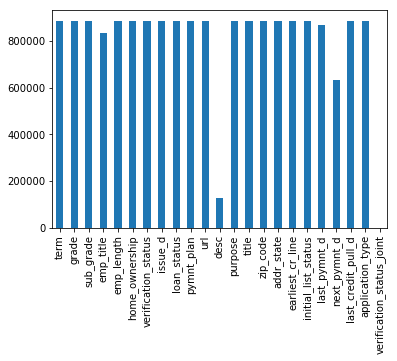

In [8]:
#plt.figure()
df[objects].count().plot.bar()

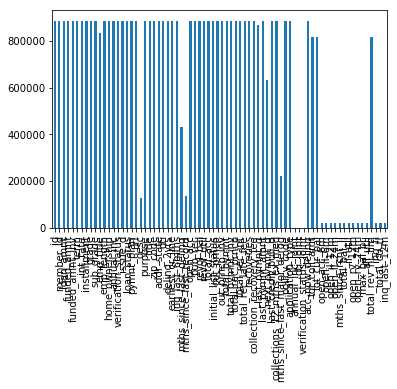

In [9]:
df.count().plot.bar()

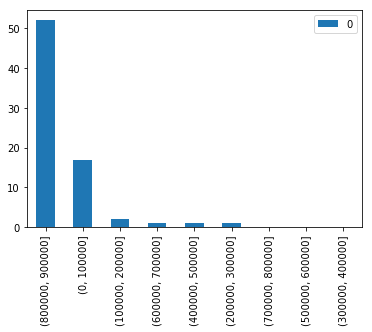

In [10]:
#plt.figure()

bins = np.arange(0,1000000, 100000)
hist = pd.cut(df.count(), bins).value_counts()
hist.to_frame().plot(kind='bar')

### Selecting attributes

In [11]:
selected = []
n = 850000
for col, count in zip(df.columns, df.count()):
    if count >= n:
        selected.append(col)
print selected
print len(selected)
data = df[selected]

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq']
48


### Cleaning the data

In [12]:
print "Number of applications: %d" % (len(data))
print "Number of NaNs: %d" % (data.isnull().values.sum())
data = data[selected]
data = data.dropna(thresh=len(selected))
print "Number of NaNs: %d" % (data.isnull().values.sum())
print "Number of applications: %d" % (len(data))

Number of applications: 887379
Number of NaNs: 18717
Number of NaNs: 0
Number of applications: 869041


### Remove columns that we cannot use

In [13]:
remove = ['member_id','int_rate', 'installment', 'grade', 'sub_grade', 'pymnt_plan',
          'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
          'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d', 'funded_amnt',
          'funded_amnt_inv', 'policy_code', 'issue_d', 'initial_list_status',
          ##
          'id', 'url', 'zip_code', 'addr_state'
         ]
selected_data = data.drop(remove, axis=1)
print len(selected_data.columns)

21


In [14]:
print selected_data.shape
print selected_data.columns.tolist()

(869041, 21)
['loan_amnt', 'term', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'title', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq']


           loan_amnt    annual_inc            dti    delinq_2yrs  \
count  869041.000000  8.690410e+05  869041.000000  869041.000000   
mean    14750.817251  7.495792e+04      18.133464       0.313605   
std      8424.695154  6.443026e+04      17.282781       0.860815   
min       500.000000  0.000000e+00       0.000000       0.000000   
25%      8000.000000  4.500000e+04      11.900000       0.000000   
50%     13000.000000  6.470000e+04      17.630000       0.000000   
75%     20000.000000  9.000000e+04      23.910000       0.000000   
max     35000.000000  9.500000e+06    9999.000000      39.000000   

       inq_last_6mths       open_acc        pub_rec     revol_bal  \
count   869041.000000  869041.000000  869041.000000  8.690410e+05   
mean         0.695523      11.542161       0.194372  1.691511e+04   
std          0.998992       5.304391       0.580457  2.240665e+04   
min          0.000000       1.000000       0.000000  0.000000e+00   
25%          0.000000       8.000000      

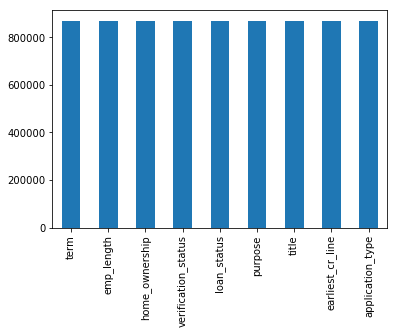

In [15]:
print selected_data.describe()
plt.figure()
objects = list(selected_data.select_dtypes(include=['object']).columns)
selected_data[objects].count().plot.bar()

### Selecting 13 features to use in this initial approach

In [16]:
features = ['emp_length',                # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'loan_amnt',                 # loan amount
            'annual_inc',                # annual income           
            'total_acc',                 # num accounts
            'delinq_2yrs',               # num past delinquencies
            'pub_rec',                   # num public records
            'inq_last_6mths',            # num inquiries past 6 months
            'collections_12_mths_ex_med',# num collections that are not medical in the last year
            'acc_now_delinq',            # num accounts on which is now delinquent
            'verification_status',       # 'Verified', 'Source Verified', 'Not Verified'
           ]

omitted_features = filter(lambda c: c not in features, selected_data.columns.tolist())
print omitted_features

['loan_status', 'title', 'earliest_cr_line', 'open_acc', 'revol_bal', 'revol_util', 'application_type']


### The unselected attributes

In [17]:
selected_data[omitted_features].head()

,loan_status,title,earliest_cr_line,open_acc,revol_bal,revol_util,application_type
0,Fully Paid,Computer,Jan-1985,3.0,13648.0,83.7,INDIVIDUAL
1,Charged Off,bike,Apr-1999,3.0,1687.0,9.4,INDIVIDUAL
2,Fully Paid,real estate business,Nov-2001,2.0,2956.0,98.5,INDIVIDUAL
3,Fully Paid,personel,Feb-1996,10.0,5598.0,21.0,INDIVIDUAL
4,Current,Personal,Jan-1996,15.0,27783.0,53.9,INDIVIDUAL


In [18]:
selected_data[features].head()

,emp_length,home_ownership,dti,purpose,term,loan_amnt,annual_inc,total_acc,delinq_2yrs,pub_rec,inq_last_6mths,collections_12_mths_ex_med,acc_now_delinq,verification_status
0,10+ years,RENT,27.65,credit_card,36 months,5000.0,24000.0,9.0,0.0,0.0,1.0,0.0,0.0,Verified
1,< 1 year,RENT,1.00,car,60 months,2500.0,30000.0,4.0,0.0,0.0,5.0,0.0,0.0,Source Verified
2,10+ years,RENT,8.72,small_business,36 months,2400.0,12252.0,10.0,0.0,0.0,2.0,0.0,0.0,Not Verified
3,10+ years,RENT,20.00,other,36 months,10000.0,49200.0,37.0,0.0,0.0,1.0,0.0,0.0,Source Verified
4,1 year,RENT,17.94,other,60 months,3000.0,80000.0,38.0,0.0,0.0,0.0,0.0,0.0,Source Verified


In [19]:
selected_data.verification_status.unique().tolist()

['Verified', 'Source Verified', 'Not Verified']

### Finding labels

In [20]:
selected_data.loan_status.value_counts()

Current                                                593170
Fully Paid                                             207496
Charged Off                                             44666
Late (31-120 days)                                      11461
In Grace Period                                          6039
Late (16-30 days)                                        2314
Does not meet the credit policy. Status:Fully Paid       1913
Default                                                  1209
Does not meet the credit policy. Status:Charged Off       725
Issued                                                     48
Name: loan_status, dtype: int64

In [21]:
status = ['Default', 'Late (31-120 days)', 'Fully Paid', 'Charged Off']
data = selected_data.loc[selected_data.loan_status.isin(status)].copy()

In [22]:
selected_data['label'] = selected_data['loan_status'].apply(lambda x : +1 if x=='Fully Paid' or x=='Current' else -1)
default = selected_data[selected_data['label'] == -1]
paid = selected_data[selected_data['label'] == 1]


In [23]:
default['loan_status'].unique()

array(['Charged Off', 'Default', 'Late (31-120 days)', 'In Grace Period',
       'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

In [24]:
print len(paid), len(default)
print "Percentage of safe loans  : %s " % (len(paid)* 100.0 / (len(default) + len(paid)))
print "Percentage of risky loans : %s " % (len(default)* 100.0 / (len(default) + len(paid)))

800666 68375
Percentage of safe loans  : 92.1321318557 
Percentage of risky loans : 7.86786814431 


### Creating  datasets

In [25]:
#safe_loans = paid.sample(frac=percentage)
dataset_x = (default[features].append(paid[features])).copy()
dataset_y = (default.label.append(paid.label)).copy()

print dataset_x.shape, dataset_y.shape

(869041, 14) (869041,)


### Encoding features

In [26]:
from sklearn import preprocessing

dataset_x.emp_length = dataset_x.emp_length.apply(lambda x: x[:-6] if 'years' in x else '0')
dataset_x.emp_length = dataset_x.emp_length.apply(lambda x: float(x[:-1]) if '+' in x else float(x))
dataset_x.term = dataset_x.term.apply(lambda x: float(x.replace("months","")))

print len(dataset_x), len(dataset_y)

869041 869041


In [27]:
print dataset_x.home_ownership.unique()
print dataset_x.purpose.unique()

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
['car' 'small_business' 'other' 'debt_consolidation' 'major_purchase'
 'credit_card' 'home_improvement' 'moving' 'house' 'medical' 'wedding'
 'vacation' 'renewable_energy' 'educational']


### Creating New Features

- Dummify a k-1 dummies out of k categorical levels (no nan data in the attribute)
- Create a Verified / Non-verified feature
- Calculate Income to Loan ratio
- Calculate log loan amount

In [29]:
home_own = pd.get_dummies(dataset_x.home_ownership, prefix='h')
del home_own['h_ANY']
dataset_x[home_own.columns] =  home_own

purpose = pd.get_dummies(dataset_x.purpose, prefix='p')
del purpose['p_other']
dataset_x[purpose.columns] =  purpose

dataset_x['verified'] = dataset_x.verification_status.apply(lambda x: int('Not' not in x))

del dataset_x['purpose']
del dataset_x['home_ownership']
del dataset_x['verification_status']

dataset_x['Income2Loan'] = dataset_x['annual_inc'] / dataset_x['loan_amnt']
dataset_x['Log_loan_amnt'] = np.log(dataset_x['loan_amnt'])


print dataset_x.shape
print dataset_x.head(3).T

(869041, 32)
                                       1             8             9
emp_length                      0.000000      4.000000      0.000000
dti                             1.000000      5.550000     18.080000
term                           60.000000     60.000000     60.000000
loan_amnt                    2500.000000   5600.000000   5375.000000
annual_inc                  30000.000000  40000.000000  15000.000000
total_acc                       4.000000     13.000000      3.000000
delinq_2yrs                     0.000000      0.000000      0.000000
pub_rec                         0.000000      0.000000      0.000000
inq_last_6mths                  5.000000      2.000000      0.000000
collections_12_mths_ex_med      0.000000      0.000000      0.000000
acc_now_delinq                  0.000000      0.000000      0.000000
h_MORTGAGE                      0.000000      0.000000      0.000000
h_NONE                          0.000000      0.000000      0.000000
h_OTHER              

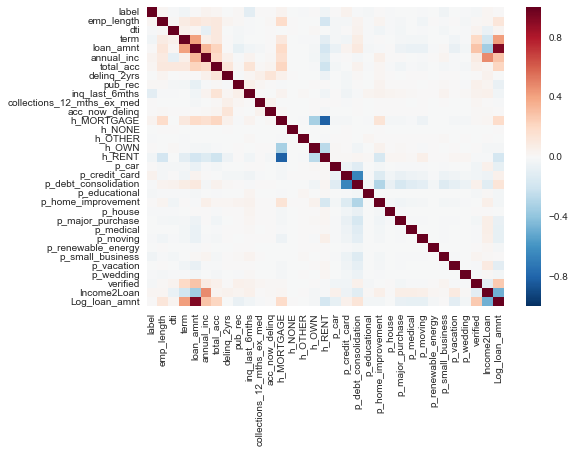

In [30]:
import seaborn as sns
sns.heatmap(pd.concat([dataset_y, dataset_x], axis=1).corr())

In [31]:
dataset_x.describe()

,emp_length,dti,term,loan_amnt,annual_inc,total_acc,delinq_2yrs,pub_rec,inq_last_6mths,collections_12_mths_ex_med,...,p_major_purchase,p_medical,p_moving,p_renewable_energy,p_small_business,p_vacation,p_wedding,verified,Income2Loan,Log_loan_amnt
count,869041.000000,869041.000000,869041.000000,869041.000000,8.690410e+05,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,...,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000
mean,5.645860,18.133464,43.200820,14750.817251,7.495792e+04,25.267915,0.313605,0.194372,0.695523,0.014186,...,0.019390,0.009545,0.006085,0.000648,0.011650,0.005305,0.002683,0.699592,6.724952,9.408899
std,3.890887,17.282781,10.998546,8424.695154,6.443026e+04,11.830778,0.860815,0.580457,0.998992,0.133461,...,0.137893,0.097231,0.077768,0.025444,0.107303,0.072640,0.051732,0.458436,8.240482,0.665628
min,0.000000,0.000000,36.000000,500.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.214608
25%,2.000000,11.900000,36.000000,8000.000000,4.500000e+04,17.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.333333,8.987197
50%,6.000000,17.630000,36.000000,13000.000000,6.470000e+04,24.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.800000,9.472705
75%,10.000000,23.910000,60.000000,20000.000000,9.000000e+04,32.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.500000,9.903488
max,10.000000,9999.000000,60.000000,35000.000000,9.500000e+06,169.000000,39.000000,86.000000,33.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1624.236000,10.463103


### Model training + cross-validation

In [33]:
print dataset_x.shape

(869041, 32)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, 
                                                    test_size=0.2, random_state=6)


#clf = RandomForestClassifier(n_estimators=100, n_jobs=-1) #500
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
#cv_results = cross_validate(clf.fit(X_train, y_train), X_train, y_train, scoring=scoring)


In [35]:
'''
for s, r in cv_results.items():
    print s, r

neg = y_train[y_train == -1].count()
pos = y_train[y_train == 1].count()
print (neg*100/pos)

neg2 = y_test[y_test == -1].count()
pos2 = y_test[y_test == 1].count()
print (neg2*100/pos2)

'''

pass

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [37]:
def roc_plot(fpr, tpr, roc_auc):
    lw = 2
    for i, f in enumerate(fpr):
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.4f)' % roc_auc[i])

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# Random Forest

### ROC curve and AUC

In [38]:
fpr = dict()
tpr = dict()
roc_auc = dict()
rf_clf = dict()

for i, n_estimators in enumerate([100, 300, 500]): #1000, 2000
    clf = RandomForestClassifier(n_estimators, n_jobs=-1)
    clf.fit(X_train, y_train)
    rf_clf[i] = clf

0.922063874713
0.922259491741
0.922242231415
{0: 0.50624283656941538, 1: 0.50648345152970764, 2: 0.50657496254955481}


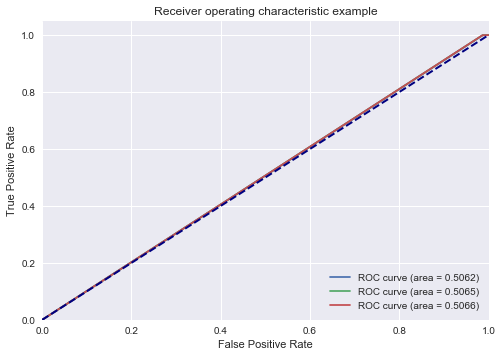

In [39]:
for i in rf_clf.keys():

    y_predict = rf_clf[i].predict(X_test)
    fpr[i], tpr[i], _ = roc_curve(y_test, y_predict, pos_label=1)
    print accuracy_score(y_test, y_predict)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
print roc_auc

roc_plot(fpr, tpr, roc_auc)

# SVM

In [40]:
print (X_train/X_train.std()).shape
print (X_train).shape

(695232, 32)
(695232, 32)


In [42]:
fpr = dict()
tpr = dict()
roc_auc = dict()
svc_clf = dict()

m = X_train.mean()
v = X_train.std()

for i, c in enumerate([0.3, 1, 3]): 
    clf = svm.LinearSVC(C=c)
    clf.fit((X_train-m)/v, y_train)
    svc_clf[i] = clf

0.921672640657
0.921592092469
0.918623316399
{0: 0.50051614830947788, 1: 0.50114494813309884, 2: 0.50121571799464426}


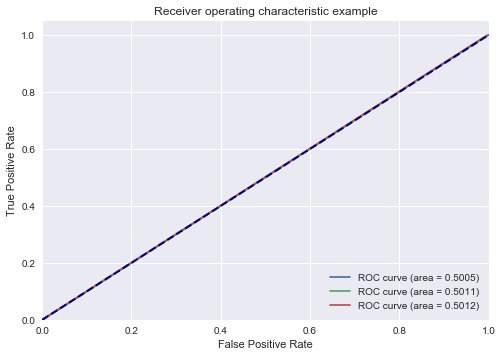

In [43]:
for i in svc_clf.keys():

    y_predict = svc_clf[i].predict((X_test - m)/v)
    fpr[i], tpr[i], _ = roc_curve(y_test, y_predict)
    print accuracy_score(y_test, y_predict)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
print roc_auc

roc_plot(fpr, tpr, roc_auc)

# Logistic Regression

In [46]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lr_clf = dict()

m = X_train.mean()
v = X_train.std()

for i, c in enumerate([0.01, 0.1, 1, 10]): 
    clf = LogisticRegression(C=c)
    clf.fit((X_train-m)/v, y_train)
    lr_clf[i] = clf

0.921977573083
0.921966066199
0.921966066199
0.921966066199
{0: 0.50212742798818977, 1: 0.50212118586886545, 2: 0.50212118586886545, 3: 0.50212118586886545}


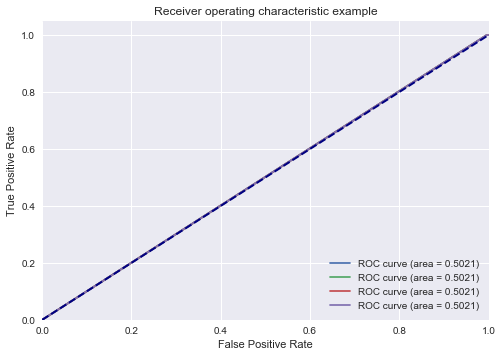

In [47]:
for i in lr_clf.keys():

    y_predict = lr_clf[i].predict((X_test - m)/v)
    fpr[i], tpr[i], _ = roc_curve(y_test, y_predict)
    print accuracy_score(y_test, y_predict)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
print roc_auc

roc_plot(fpr, tpr, roc_auc)